In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [2]:
%matplotlib widget

Then we can also consider $\Delta E(p_i)$ as a function of $p$:

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a_2(p, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \mu} e^{i\alpha t} = \sqrt{\frac{\pi}{\mu}} e^{-\alpha^2/(4\mu)}$$

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$


In [3]:
# envelope for gauss pulse
def f_ir(tau, sigma_IR):
    return np.exp(-tau**2/(2*sigma_IR**2))

In [4]:
# vector potential
def A_ir(tau, sigma_IR, F_const_IR, omega_IR):
    # only sin
    return - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR*tau) / omega_IR

In [5]:
# all times in femtoseconds
def a(p, tau, kappa=0.1, fwhm_xuv=0.3, fwhm_ir=6, F_intensity_IR=1./200):
    omega_X = 2.5
    I_p = 0.5
    p_0_sq = 2 * (omega_X - I_p)
    # from femtosecond fwhm to atomic time units
    sigma_XUV = fwhm_xuv / (2*np.sqrt(2*np.log(2))) / 2.41e-2
    
    F_const_IR = F_intensity_IR
    omega_IR = 0.05
    # from femtosecond fwhm to atomic time units
    sigma_IR = fwhm_ir/(2*np.sqrt(2*np.log(2))) / 2.41e-2

    # gaussian envelope
    f_ir_cal = np.exp(-tau**2/(2*sigma_IR**2))

    # electric field
    F_ir_calc = F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau)

    # vector potential
    A_ir_calc = - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR * tau) / omega_IR
    
    alpha = 0.5*(p**2 + 2*p*A_ir_calc - p_0_sq)
    mu = 1/(2*sigma_XUV**2) + 0.5j*kappa + 0.5j*(p + A_ir_calc) * F_ir_calc  # where (p + A_ir) is the brackets for p_i 

    f = np.sqrt(np.pi/mu) * np.exp(-alpha**2/(4*mu))
    print(kappa, sigma_XUV, sigma_IR, F_intensity_IR)
    return np.abs(f).T

0.001 5.286235271502194 105.72470543004387 0.01


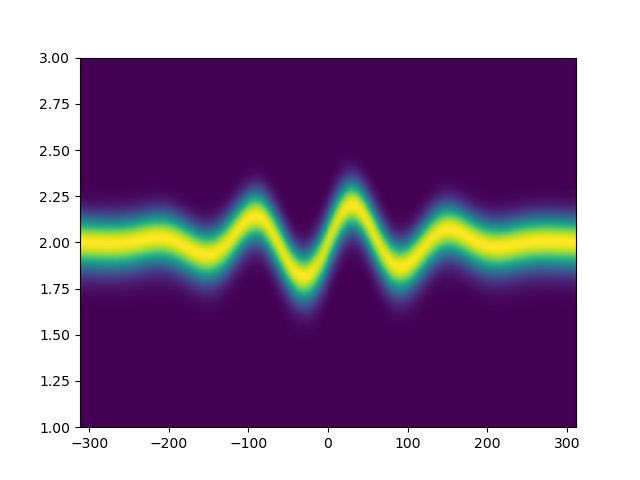

In [6]:
plt.figure()
p = np.linspace(1, 3, 1000)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 1000)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=1e-3, F_intensity_IR=1/100.)
plt.pcolormesh(tau, p, res)

0.1 5.286235271502194 105.72470543004387 0.005


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

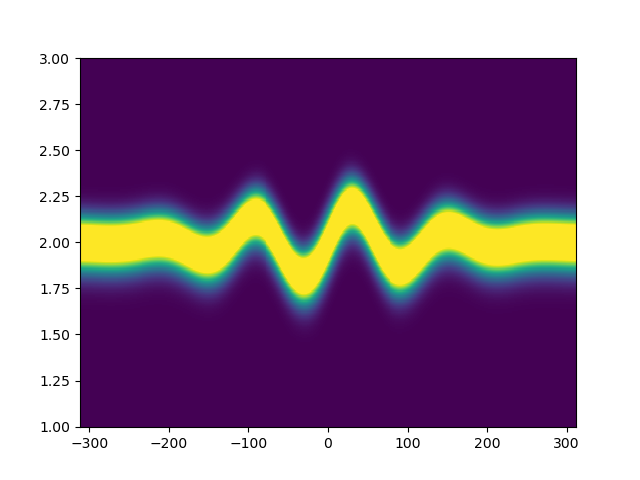

In [7]:
p = np.linspace(1, 3, 300)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)

fig = plt.figure()

plot2d = plt.pcolormesh(tau, p, res)

def update(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR))
    fig.canvas.draw_idle()
    
interact(update, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));

0.1 5.286235271502194 105.72470543004387 0.005


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

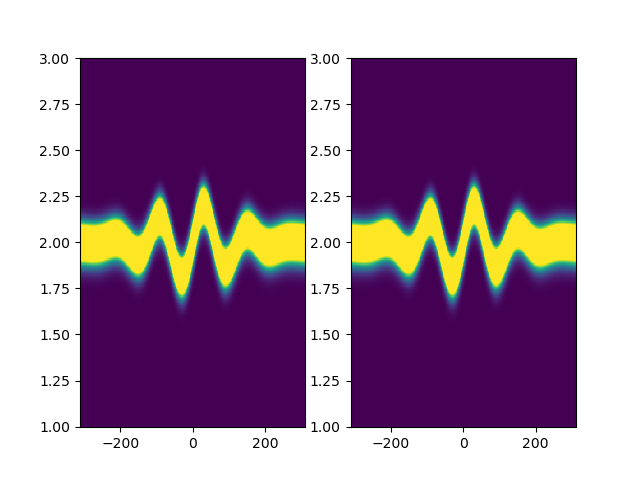

In [18]:
p = np.linspace(1, 3, 300)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)**2

fig, axs = plt.subplots(1, 2)

plot2d_left = axs[0].pcolormesh(tau, p, res)
plot2d_right = axs[1].pcolormesh(tau, p, res)

def update_left(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_left.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()

def update_right(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_right.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()
    
interact(update_left, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));
interact(update_right, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));

0.09 5.286235271502194 105.72470543004387 0.02


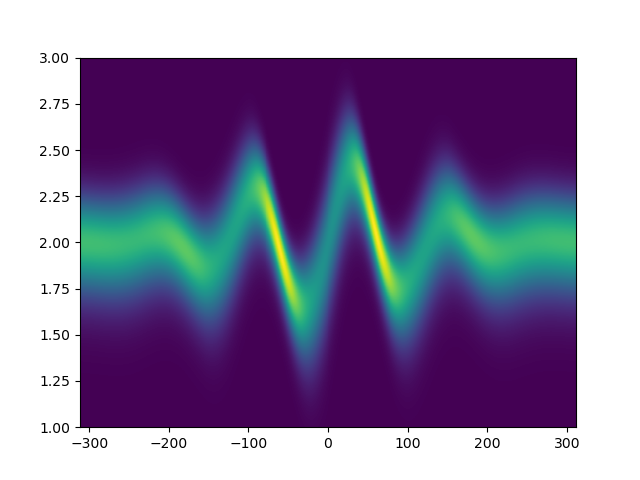

In [17]:
plt.figure()
p = np.linspace(1, 3, 1000)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 1000)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=0.09, F_intensity_IR=0.02)**2
plt.pcolormesh(tau, p, res)